## Part 4 ##
Michal Kononenko
20510469

In [1]:
import sys
import os

sys.path.append(os.path.abspath(os.path.curdir))
sys.path.append(os.path.abspath(os.path.pardir))


In [2]:
from typing import Union
import numpy as np
import matplotlib.pyplot as plt
from part4 import DSCCurve
from interpolators import lagrange_evaluate, lagrange_integrate

%matplotlib inline

Read in the DSC Curve

In [3]:
curve = DSCCurve(os.path.join(os.path.pardir, 'lab1_data.csv'))

### Curve Plotting ###

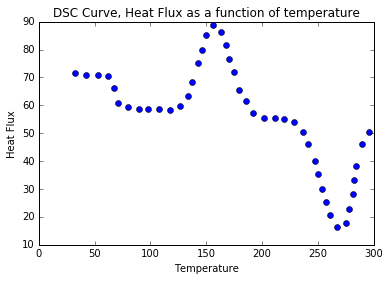

In [4]:
x_axis = [point.temperature for point in curve]
y_axis = [point.heat_flux for point in curve]

plt.plot(x_axis, y_axis, 'o')
plt.xlabel('Temperature')
plt.ylabel('Heat Flux')
plt.title('DSC Curve, Heat Flux as a function of temperature')
plt.show()

##### Derivative #####

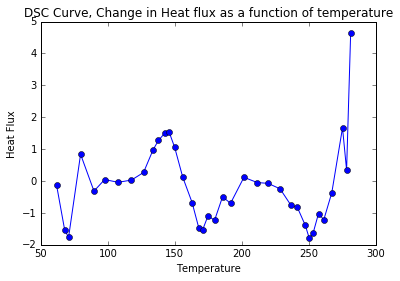

In [5]:
derivative = curve.derivative(order=1)

x_axis = [point.temperature for point in derivative]
y_axis = [point.change_in_flux for point in derivative]

plt.plot(x_axis, y_axis, 'o-')
plt.xlabel('Temperature')
plt.ylabel('Heat Flux')
plt.title('DSC Curve, Change in Heat flux as a function of temperature')
plt.show()

#### Glass Transition Temperature ####

In [6]:
print(curve.glass_transition_temperature(40, 100))

Derivative(temperature=70.6085, change_in_flux=array(-1.7703415473515633))


#### Melting Temperature ####

In [7]:
print(curve.melting_temperature)

DSCPoint(temperature=267.164, heat_flux=16.4021)


In [8]:
spread = 10
coeffs = curve.interpolant(
    curve.melting_temperature.temperature - spread,
    curve.melting_temperature.temperature + spread
)

print(coeffs)



[  8.43017392e-04  -6.12396163e-01   1.46341894e+02  -1.14458429e+04]


#### Crystallization Temperature ####

In [9]:
print(curve.crystallization_temperature)

DSCPoint(temperature=155.889, heat_flux=88.8889)


### Phase Changes ###

In [10]:
coeffs = curve.interpolant(0, 55)

print(coeffs)


[  2.64760447e-03  -2.52629124e-01   7.68596513e+01]


In [11]:
temp = 100
spread = 15
coeffs = curve.interpolant(temp - spread, temp + spread)
print(coeffs)

[  1.11022302e-16  -7.10542736e-15   5.87302000e+01]


In [12]:
temp = 210
spread = 10
coeffs = curve.interpolant(temp - spread, temp + spread)
print(coeffs)

print(curve[26])

[ -3.67828945e-03   1.51954551e+00  -1.01288064e+02]
DSCPoint(temperature=211.556, heat_flux=55.5556)


### Latent Heat ###

#### Crystallization ####

In [13]:
temp = curve.crystallization_temperature.temperature

inter_lower_limit = temp - 20
inter_upper_limit = temp + 15

coeffs = curve.interpolant(inter_lower_limit, inter_upper_limit)

print('polynomial order is ' + str(len(coeffs)))

t1 = 145.799
t2 = 170.767

heat_flux = lagrange_integrate(coeffs, t1, t2)

print('Area is ' + str(heat_flux))


polynomial order is 8
Area is 2128.14017165


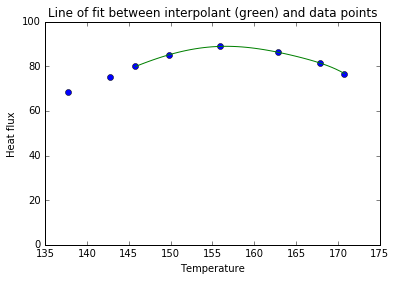

In [14]:
# Plotting interpolant

x1 = [point.temperature for point in curve 
      if inter_lower_limit <= point.temperature <= inter_upper_limit]
y1 = [point.heat_flux for point in curve 
      if inter_lower_limit <= point.temperature <= inter_upper_limit]

x2 = np.linspace(t1, t2, 50)
y2 = lagrange_evaluate(coeffs, x2)

plt.plot(x1, y1, 'o', x2, y2, '-')
plt.ylim(0, 100)
plt.xlabel('Temperature')
plt.ylabel('Heat flux')
plt.title('Line of fit between interpolant (green) and data points')
plt.show()

#### Melting 

Calculate for right-hand interval of interpolant

In [15]:
temp = curve.melting_temperature.temperature

inter_lower_limit = temp -25
inter_upper_limit = temp + 15

coeffs = curve.interpolant(inter_lower_limit, inter_upper_limit)

print('polynomial order is ' + str(len(coeffs)))

t1 = 250
t2 = 278.228

heat_flux = lagrange_integrate(coeffs, t1, t2)

print('Area is ' + str(heat_flux))

polynomial order is 9
Area is 608.193359375


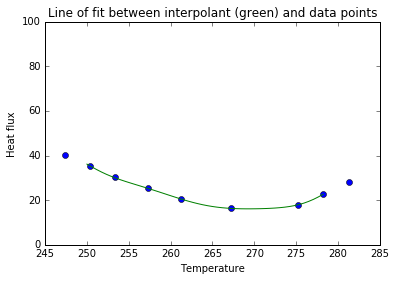

In [16]:
# Plotting interpolant

x1 = [point.temperature for point in curve 
      if inter_lower_limit <= point.temperature <= inter_upper_limit]
y1 = [point.heat_flux for point in curve 
      if inter_lower_limit <= point.temperature <= inter_upper_limit]

x2 = np.linspace(t1, t2, 50)
y2 = lagrange_evaluate(coeffs, x2)

plt.plot(x1, y1, 'o', x2, y2, '-')
plt.ylim(0, 100)
plt.xlabel('Temperature')
plt.ylabel('Heat flux')
plt.title('Line of fit between interpolant (green) and data points')
plt.show()

Calculate for second half of the interpolant

In [17]:
inter2_lower_limit = 220
inter2_upper_limit = 260

coeffs = curve.interpolant(inter2_lower_limit, inter2_upper_limit)

print('polynomial order is ' + str(len(coeffs)))

t12 = 241.46
t22 = 250

heat_flux_2 = lagrange_integrate(coeffs, t12, t22)

print('Area is ' + str(heat_flux_2))

polynomial order is 7
Area is 357.637187243


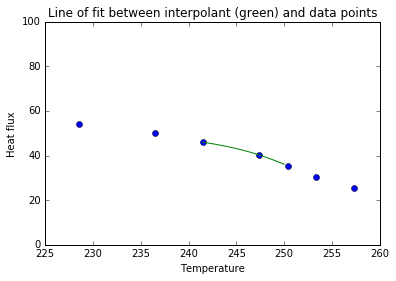

In [18]:
# Plotting interpolant

x1 = [point.temperature for point in curve 
      if inter2_lower_limit <= point.temperature <= inter2_upper_limit]
y1 = [point.heat_flux for point in curve 
      if inter2_lower_limit <= point.temperature <= inter2_upper_limit]

x2 = np.linspace(t12, t22, 50)
y2 = lagrange_evaluate(coeffs, x2)

plt.plot(x1, y1, 'o', x2, y2, '-')
plt.ylim(0, 100)
plt.xlabel('Temperature')
plt.ylabel('Heat flux')
plt.title('Line of fit between interpolant (green) and data points')
plt.show()

In [19]:
total_area = heat_flux + heat_flux_2

print('Heat flux is ' + str(total_area))

Heat flux is 965.830546618


### Phase Changes ###
At the points listed, a sign change occurs in the second derivative. 
It is up to the user to determine if the change occured due to noise, or
whether a more significant event happened at this temperature

In [20]:
print(curve.phase_changes)

[Derivative(temperature=61.7037, change_in_flux=array(-0.11873362670267795)), Derivative(temperature=70.6085, change_in_flux=array(0.12801645867648404)), Derivative(temperature=107.587, change_in_flux=array(-0.009550396827762597)), Derivative(temperature=117.582, change_in_flux=array(0.028002958165643577)), Derivative(temperature=145.799, change_in_flux=array(-0.06371761113405228)), Derivative(temperature=170.767, change_in_flux=array(0.13457244425080717)), Derivative(temperature=174.72, change_in_flux=array(-0.021304003661498427)), Derivative(temperature=179.656, change_in_flux=array(0.10381807596422732)), Derivative(temperature=185.614, change_in_flux=array(-0.0027662101201713085)), Derivative(temperature=191.571, change_in_flux=array(0.042648287140764296)), Derivative(temperature=211.556, change_in_flux=array(-0.008850332096699276)), Derivative(temperature=241.46, change_in_flux=array(0.0053244109731167555)), Derivative(temperature=247.402, change_in_flux=array(-0.16966959554702044)